# WeatherPy - Weather Visualization

### Dependencies and data

In [1]:
%matplotlib inline

import datetime as dt
import gmaps
import requests
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import config

In [2]:
# Settings
gmaps.configure(api_key=config.GMAPS_API_KEY)

In [3]:
# Load data
weather = pd.read_csv('data/city_weather.csv')
weather.head(2)

,ID,City,Country,Time,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Description,Rain,Snow
0,0,Garoowe,SO,2020-11-05 13:21:54,8.41,48.48,86.65,22,0,2.53,clear sky,0.0,0.0
1,1,Vendas Novas,PT,2020-11-05 13:21:54,38.68,-8.46,63.00,59,20,14.99,few clouds,0.0,0.0


In [4]:
# Split northern and southern hemispheres
north_weather = weather[weather['Latitude'] >= 0]
south_weather = weather[weather['Latitude'] < 0]
north_weather.shape[0], south_weather.shape[0]

(705, 318)

### Linear regression plots

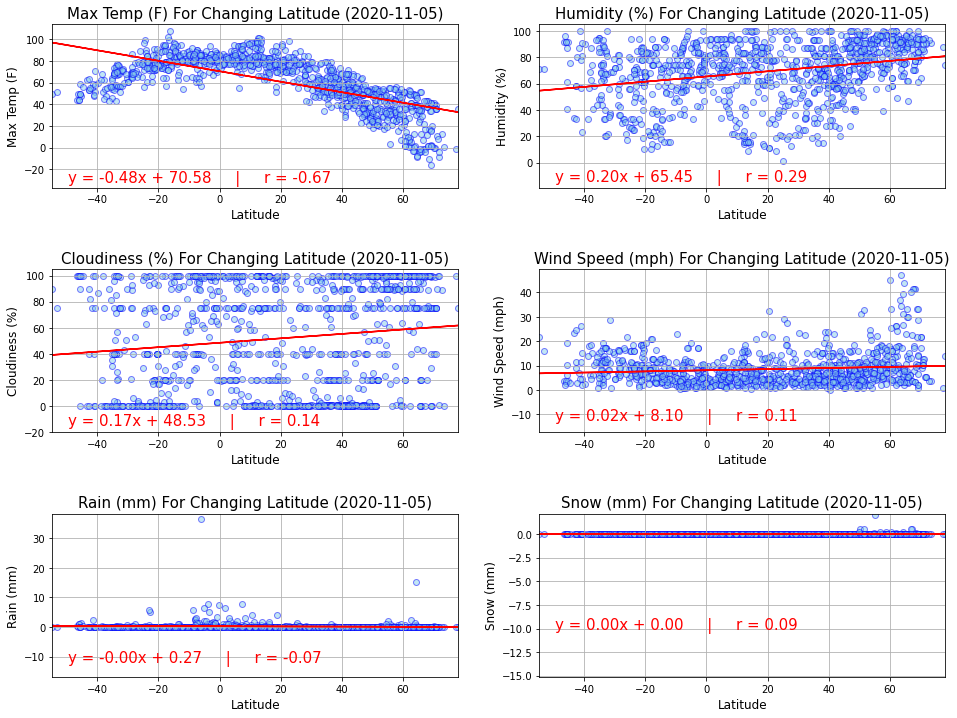

In [13]:
def weather_linreg(y, x='Latitude', data=weather, ax=plt, text_loc=None, x_suffix=''):
    
    '''
    Plot a weather feature against the latitude, including the regression line.
    
    Args:
        [1] y (array-like) - name of weather feature
        [2] x (array-like) - name of latitude feature
        [3] data (Pandas dataframe) - weather data
        [4] ax (Matplotlib axis) - axis to plot on
        [5] text_loc (tuple(int, int)) - coordinates to for text annotation
        [6] x_suffix (str) - suffix to add to x-label
        
    Returns: None
    '''
    
    # Linear regression
    m, b, r, p, s = linregress(data[x], data[y]) # regression line
    line = m * data[x] + b # line values
    eq = f'y = {m:.2f}x + {b:.2f}     |     r = {r:.2f}' # equation string
    
    # Plot points and line
    ax.scatter(data[x], data[y], alpha=0.5, c='skyblue', edgecolor='blue')
    ax.plot(data[x], line, 'red')
    
    # Annotate equation and correlation
    if text_loc is None:
        ax.set_xlim(data[x].min(), data[x].max())
        ax.set_ylim(ax.get_ylim()[0] - 15, ax.get_ylim()[1])
        text_loc = (ax.get_xlim()[0] + 5, ax.get_ylim()[0] + 5)
    ax.annotate(eq, text_loc, c='red', fontsize=15)
    
    # Units
    if y == 'Max Temp': # degrees Fahrenheit
        y += ' (F)' 
    elif y == 'Wind Speed': # miles per hour
        y += ' (mph)'
    elif y in 'Rain Snow':
        y += ' (mm)'
    else: # percent humidity and cloudiness
        y += ' (%)'
    
    # Formatting
    ax.set_title(y + ' For Changing ' + x + f' ({data.iloc[0, 3][:10]})', fontsize=15)
    ax.set_ylabel(y, fontsize=12)
    ax.set_xlabel(x + x_suffix, fontsize=12)
    ax.grid()
    
    
# Figure and axes
weather_cols, j = ['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Rain', 'Snow'], 0
n_wcols = len(weather_cols)
fig, ax = plt.subplots(n_wcols // 2, 2, figsize=(16, n_wcols * 2))
fig.subplots_adjust(hspace=0.5)

# Weather subplots
for i in range(n_wcols // 2):
    weather_linreg(weather_cols[j], ax=ax[i][0])
    weather_linreg(weather_cols[j+1], ax=ax[i][1])
    j += 2

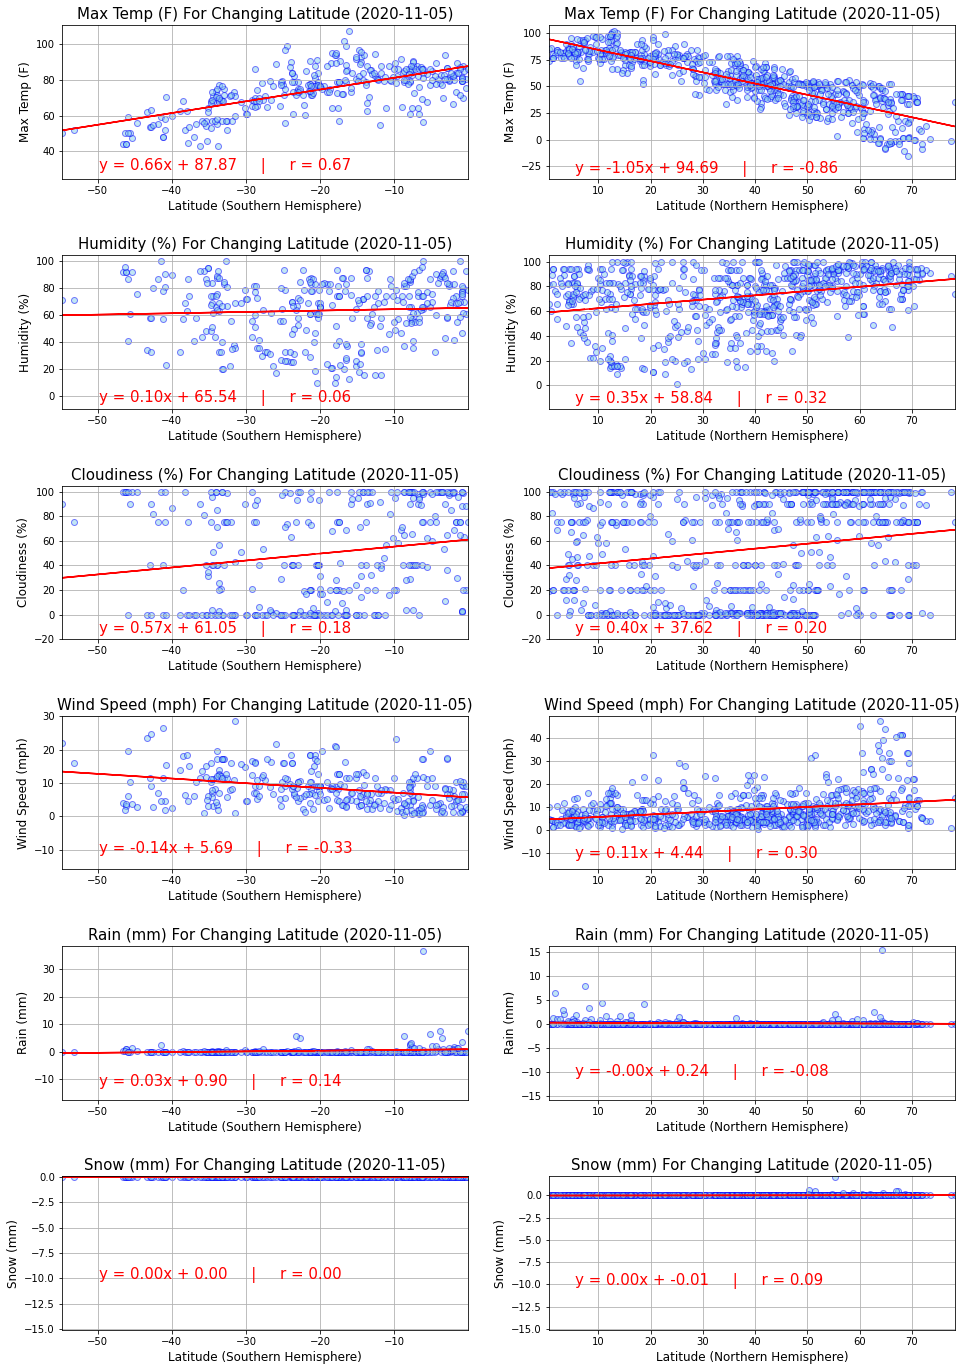

In [14]:
# Figure and axes
fig, ax = plt.subplots(n_wcols, 2, figsize=(16, n_wcols * 4))
fig.subplots_adjust(hspace=0.5)

# Weather subplots
for i in range(n_wcols):
    weather_linreg(weather_cols[i], data=south_weather, ax=ax[i][0], x_suffix=' (Southern Hemisphere)')
    weather_linreg(weather_cols[i], data=north_weather, ax=ax[i][1], x_suffix=' (Northern Hemisphere)')

### Weather Heatmaps

In [15]:
# For Jupyterlab
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager
# !jupyter lab build

In [26]:
def weather_heatmap(data, measurement, center=(30.0, 31.0), zoom_level=1.5, point_radius=4, max_intensity=400):
    
    '''
    Plot a heatmap of a specified weather measurement using the Google Maps API.
    
    Args:
        [1] data (Pandas dataframe) - weather data
        [2] measurement (str) - name of weather measurement
        [3] center (tuple(float, float)) - coordinates for map center
        [4] zoom_level (float) - map zoom
        [5] point_radius - heat radius
        [6] max_intensity - max value for heat scale
        
    Returns:
        [Google Maps figure] weather heatmap
    '''
    
    # Locations and measurements
    locations = data[['Latitude', 'Longitude']]
    weights = data[measurement].apply(lambda t: max(t, 0))

    # Heatmap
    heatmap_layer = gmaps.heatmap_layer(locations, weights, dissipating=False,
                                        point_radius=point_radius, max_intensity=max_intensity)
    fig = gmaps.figure(center=center, zoom_level=zoom_level)
    fig.add_layer(heatmap_layer)
    print(measurement)
    return fig


# Max temp heatmap
weather_heatmap(weather, weather_cols[0])

Max Temp


Figure(layout=FigureLayout(height='420px'))

In [27]:
# Humidity heatmap
weather_heatmap(weather, weather_cols[1])

Humidity


Figure(layout=FigureLayout(height='420px'))

In [28]:
# Cloudiness heatmap
weather_heatmap(weather, weather_cols[2])

Cloudiness


Figure(layout=FigureLayout(height='420px'))

In [32]:
# Wind speed heatmap
weather_heatmap(weather, weather_cols[3], max_intensity=100)

Wind Speed


Figure(layout=FigureLayout(height='420px'))

In [36]:
# Rain heatmap
weather_heatmap(weather, weather_cols[4], max_intensity=100)

Rain


Figure(layout=FigureLayout(height='420px'))

In [37]:
# Snow heatmap
weather_heatmap(weather, weather_cols[5], max_intensity=100)

Snow


Figure(layout=FigureLayout(height='420px'))